In [1]:
import os
from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = [
            {
                'name':'fix_opex',
                'const_value':-5.000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-0.005,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':0.045,
                'target':'income',
                'multiply':'oil_volume'
            },
            {
                'name':'capex',
                'array_values':{'date':['2021-01-01'],'value':[-70000]},
                'target':'capex'
            }
    ]

In [3]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.15,
        'freq_di':'A',
        'qi':{'dist':'norm', 'kw':{'loc':2500,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':5000
    },
    'start':'2021-01-01',
    'end':'2030-01-01',
    'freq_input':'A',
    'freq_output':'A',
    'rate_limit': 80,
    'iter':10,
    'cashflow_params':cashflow_params
}
p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: dist='norm' kw={'loc': 2500, 'scale': 200} seed=None bbl/d 
 Di: 0.15 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2030, 1, 1), time_list=None, freq_input='A', freq_output='A', rate_limit=80.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', iter=1, const_value=-5.0, wi=1, periods=None, array_values=None, target='opex', multiply=None, agg='sum', depends=False), CashFlowParams(name='var_opex', iter=1, const_value=-0.005, wi=1, periods=None, array_values=None, target='opex', multiply='oil_volume', agg='sum', depends=False), CashFlowParams(name='income', iter=1, const_value=0.045, wi=1, periods=None, array_values=None, target='income', multiply='oil_volume', agg='sum', depends=False), CashFlowParams(name='capex', iter=1, const_value=None, wi=1, periods=None, array_values=ChgPts(date=[datetime.date(2021, 1, 1)], value=[-70000.0]), target='capex', multiply=None, agg='sum', depends

In [4]:
fore1 = p1.generate_forecast()
fore1

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:239: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period
date,,,,,,,,,,,,,
2021,2406.121380,0.000000e+00,0,815540.222197,5000.0,2593.878620,0.518776,1.078033,0.000000e+00,0.0,1.069097e+06,1825000.0,pdp
2022,2070.967864,8.155402e+05,0,758741.098269,5000.0,2929.032136,0.585806,1.414330,1.069097e+06,1825000.0,1.121742e+06,1825000.0,pdp
2023,1782.498559,1.517482e+06,0,653054.515321,5000.0,3217.501441,0.643500,1.805051,2.243485e+06,3650000.0,1.219701e+06,1825000.0,pdp
2024,1534.210728,2.121649e+06,0,562749.348433,5000.0,3465.789272,0.693158,2.259005,3.508498e+06,5475000.0,1.305953e+06,1827500.0,pdp
2025,1319.964848,2.642981e+06,0,484362.852924,5000.0,3680.035152,0.736007,2.787980,4.855391e+06,7305000.0,1.378607e+06,1827500.0,pdp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,1253.297139,3.409157e+06,9,459170.837244,5000.0,3746.702861,0.749341,2.989477,5.970252e+06,9130000.0,1.399406e+06,1825000.0,pdp
2027,1078.722845,3.833955e+06,9,395212.002158,5000.0,3921.277155,0.784255,3.635111,7.401518e+06,10955000.0,1.458688e+06,1825000.0,pdp
2028,928.465357,4.199581e+06,9,340561.609314,5000.0,4071.534643,0.814307,4.385231,8.887628e+06,12780000.0,1.511873e+06,1827500.0,pdp


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

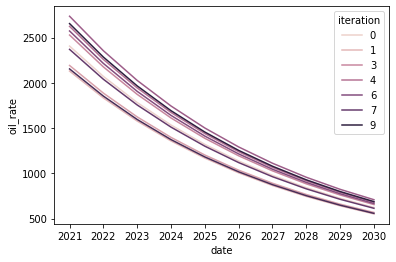

In [5]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration')

In [6]:
c1 = p1.generate_cashflow()

In [7]:
c1[0].fcf()

,income,total_income,fix_opex,var_opex,total_opex,capex,total_capex,fcf,cum_fcf
2021,36699.309999,36699.309999,-5.0,-4077.701111,-4082.701111,-70000.0,-70000.0,-37383.391112,-37383.391112
2022,34143.349422,34143.349422,-5.0,-3793.705491,-3798.705491,0.0,0.0,30344.643931,-7038.747181
2023,29387.453189,29387.453189,-5.0,-3265.272577,-3270.272577,0.0,0.0,26117.180613,19078.433431
2024,25323.720679,25323.720679,-5.0,-2813.746742,-2818.746742,0.0,0.0,22504.973937,41583.407369
2025,21796.328382,21796.328382,-5.0,-2421.814265,-2426.814265,0.0,0.0,19369.514117,60952.921486
2026,18730.568382,18730.568382,-5.0,-2081.174265,-2086.174265,0.0,0.0,16644.394118,77597.315603
2027,16121.549610,16121.549610,-5.0,-1791.283290,-1796.283290,0.0,0.0,14325.266320,91922.581923
2028,13892.242264,13892.242264,-5.0,-1543.582474,-1548.582474,0.0,0.0,12343.659790,104266.241713
2029,11957.163727,11957.163727,-5.0,-1328.573747,-1333.573747,0.0,0.0,10623.589980,114889.831693
2030,11044.538319,11044.538319,-5.0,-1227.170924,-1232.170924,0.0,0.0,9812.367394,124702.199087


In [8]:
p1.npv([0.10])

,npv,iteration
0.1,75797.786989,0
0.1,59054.424462,1
0.1,62807.643462,2
0.1,83196.328786,3
0.1,88998.265609,4
0.1,95774.464815,5
0.1,85904.215627,6
0.1,73586.595775,7
0.1,60483.108999,8
0.1,90840.790900,9


In [9]:
p1.irr(freq_output='A')

,irr
0,0.670642
1,0.509995
2,0.543547
3,0.751902
4,0.820952
5,0.908365
6,0.783507
7,0.647692
8,0.522615
9,0.843961


[ 0.   2.5  5.   7.5 10. ]
[1.25 1.25 1.25 1.25 1.25]
